# Visualize simulation data over sensors
- This script is used to visualize hourly mean and monthly mean simulation data, respectively.
- Simulations: CNTL_PT, LCZ_PT.

In [1]:
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [16]:
output_dir = home_path + '0_lcz_mcr/output_analysis/single_point/variation_diurnal/'
hourly_mean = pd.read_csv(output_dir + 'hourly_mean.csv')
monthly_mean = pd.read_csv(output_dir + 'monthly_mean.csv')
tem_list = ['temp_hourly_avg_corrected', 'TSA_def', 'TSA_lcz']
rh_list = ['rh_hourly_avg_corrected', 'RH2M_def', 'RH2M_lcz']
label_list = ['OBS','CNTL', 'LCZ']
var_list = [tem_list, rh_list]
hourly_mean_df = hourly_mean.drop(columns='sensor').groupby(['timestamp']).mean().reset_index()
monthly_mean_df = monthly_mean.drop(columns='sensor').groupby(['timestamp']).mean().reset_index()
hourly_5_df = hourly_mean.drop(columns='sensor').groupby(['timestamp']).quantile(0.05).reset_index()
hourly_95_df = hourly_mean.drop(columns='sensor').groupby(['timestamp']).quantile(0.95).reset_index()
monthly_5_df = monthly_mean.drop(columns='sensor').groupby(['timestamp']).quantile(0.05).reset_index()
monthly_95_df = monthly_mean.drop(columns='sensor').groupby(['timestamp']).quantile(0.95).reset_index()
temporal_list = [hourly_mean_df, monthly_mean_df]
list_5 = [hourly_5_df, monthly_5_df]
list_95 = [hourly_95_df, monthly_95_df]

In [12]:
title_list = ['(a) 2m air temperature', '(b) 2m relative humidity', '(c) 2m air temperature', '(d) 2m relative humidity']
lc0 = '#e41a1c'
lc1 = '#377eb8'
lc2 = '#4daf4a'
lc_list = [lc0, lc1, lc2]
linewidth = 0.5
labelcolor = '#6b6b6b'
padding = 3
marker = 'o'
labelfont = 6
xlable_list = ['Hour', 'Month']
pad = 1
xwidth = 0.5
length = 2
marker_size = 1
marker_linewidth = 0.2
handletextpad = 0.5
unit_list = ['°C', '%']
ylim_list = [[4, 20], [55, 95]]
x_offset = 0.2
x_loc = -0.075

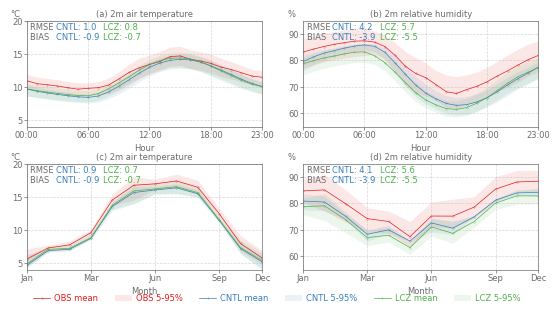

In [17]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(5.5, 3))
ax = axes.flatten()
for i in range(2):
    data = temporal_list[i]
    data_5 = list_5[i]
    data_95 = list_95[i]
    for j, var in enumerate(var_list):
        data_var = data[var]
        data5_var = data_5[var]
        data95_var = data_95[var]
        ax[i * 2 + j].text(0.015, 0.9, 'RMSE ', fontsize=labelfont, color=labelcolor, horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 2 + j].transAxes)
        ax[i * 2 + j].text(0.015, 0.8, 'BIAS ', fontsize=labelfont, color=labelcolor, horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 2 + j].transAxes)
        for m, sim in enumerate(var):
            data_var_sim = data_var[var[m]]
            data_5_var_sim = data5_var[var[m]]
            data_95_var_sim = data95_var[var[m]] 
            ax[i * 2 + j].plot(range(len(data_var_sim)), data_var_sim, label = label_list[m] + ' mean', linewidth = linewidth, color = lc_list[m], marker = marker, markersize = marker_size, markerfacecolor = 'none', markeredgewidth = marker_linewidth)
            ax[i * 2 + j].fill_between(range(len(data_var_sim)), data_5_var_sim, data_95_var_sim, label = label_list[m] + ' 5-95%', color = lc_list[m], alpha = 0.1, linewidth = 0)
            if m > 0:
                rmse = np.sqrt(np.mean((data_var_sim - data_var[var[0]])**2))
                ax[i * 2 + j].text( x_loc + x_offset * m, 0.9, label_list[m] + ': {:.1f}'.format(rmse), fontsize=labelfont, color=lc_list[m], horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 2 + j].transAxes) 
                bis = np.mean(data_var_sim - data_var[var[0]])
                ax[i * 2 + j].text( x_loc + x_offset * m, 0.8, label_list[m] + ': {:.1f}'.format(bis), fontsize=labelfont, color=lc_list[m], horizontalalignment='left', verticalalignment='bottom', transform=ax[i * 2 + j].transAxes)
        ax[i * 2 + j].set_title(title_list[i * 2 + j], fontsize = labelfont, color = labelcolor, pad = padding)   
        ax[i * 2 + j].grid(True, linestyle='--', linewidth=0.5, alpha=0.5)    
        ax[i * 2 + j].set_xlabel(xlable_list[i], fontsize = labelfont, color = labelcolor, labelpad = padding)
        ax[i * 2 + j].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i * 2 + j].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i * 2 + j].spines['top'].set_color(labelcolor)
        ax[i * 2 + j].spines['right'].set_color(labelcolor)
        ax[i * 2 + j].spines['bottom'].set_color(labelcolor)
        ax[i * 2 + j].spines['left'].set_color(labelcolor)
        ax[i * 2 + j].spines['top'].set_linewidth(xwidth)
        ax[i * 2 + j].spines['right'].set_linewidth(xwidth)
        ax[i * 2 + j].spines['bottom'].set_linewidth(xwidth)
        ax[i * 2 + j].spines['left'].set_linewidth(xwidth)
        ax[i * 2 + j].set_ylabel(unit_list[j], labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        ax[i * 2 + j].yaxis.set_label_coords(-0.05, 1.025)
        ax[i * 2 + j].set_ylim(ylim_list[j])
    ax[i].set_xlim([0, 23])   
    ax[i + 2].set_xlim([0, 11]) 
    ax[i].set_xticks([0, 6, 12, 18, 23])
    ax[i + 2].set_xticks([0, 3, 6, 9, 11])   
    ax[i].set_xticklabels(['00:00', '06:00', '12:00', '18:00', '23:00']) 
    ax[i + 2].set_xticklabels(['Jan', 'Mar', 'Jun', 'Sep', 'Dec'])

plt.subplots_adjust(left=0.045, right=0.975, bottom=0.12, top=0.95, wspace=0.175, hspace= 0.35)
lines, labels = ax[0].get_legend_handles_labels()
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=6)
llc = [lc0, lc0, lc1, lc1, lc2, lc2]
for t, text in enumerate(legend.get_texts()):
    text.set_color(llc[t])
fig.savefig(output_dir + 'temporal_variation.png', dpi=300)    
fig.savefig(output_dir + 'temporal_variation.pdf', dpi=600)  


# Result description

In [18]:
# minimum temperature in a day, OBS
var = 'temp_hourly_avg_corrected'
print(round(hourly_mean_df[var].min(),1), hourly_mean_df[var].idxmin(), 
      round(hourly_5_df[var].min(), 1),
      round(hourly_95_df[var].min(), 1))

9.7 5 8.5 10.6


In [191]:
# minimum temperature in a day, OBS
var = 'temp_hourly_avg_corrected'
print(round(hourly_mean_df[var].mean(),1), 
      round(hourly_5_df[var].mean(), 1),
      round(hourly_95_df[var].mean(), 1))

11.9 10.6 13.1


In [192]:
# maximum temperature in a day, OBS
var = 'temp_hourly_avg_corrected'
print(round(hourly_mean_df[var].max(),1), hourly_mean_df[var].idxmax(), 
      round(hourly_5_df[var].max(), 1),
      round(hourly_95_df[var].max(), 1))

14.7 15 13.2 16.1


In [19]:
# minimum temperature in a day, CNTL_PT
var = 'TSA_def'
print(round(hourly_mean_df[var].min(),1), hourly_mean_df[var].idxmin(), 
      round(hourly_5_df[var].min(), 1),
      round(hourly_95_df[var].min(), 1))

8.4 6 7.6 8.9


In [195]:
var = 'TSA_def'
print(round(hourly_mean_df[var].mean(),1), 
      round(hourly_5_df[var].mean(), 1),
      round(hourly_95_df[var].mean(), 1))

11.6 10.4 12.3


In [20]:
# maximum temperature in a day, CNTL_PT
var = 'TSA_def'
print(round(hourly_mean_df[var].max(),1), hourly_mean_df[var].idxmax(), 
      round(hourly_5_df[var].max(), 1),
      round(hourly_95_df[var].max(), 1))

14.2 15 12.8 15.0


In [188]:
# minimum temperature in a day, LCZ_PT
var = 'TSA_lcz'
print(round(hourly_mean_df[var].min(),1), hourly_mean_df[var].idxmin(), 
      round(hourly_5_df[var].min(), 1),
      round(hourly_95_df[var].min(), 1))

8.9 5 8.0 9.6


In [196]:
# maximum temperature in a day, LCZ_PT
var = 'TSA_lcz'
print(round(hourly_mean_df[var].max(),1), hourly_mean_df[var].idxmax(), 
      round(hourly_5_df[var].max(), 1),
      round(hourly_95_df[var].max(), 1))

14.6 15 13.3 15.4


In [197]:
var = 'TSA_lcz'
print(round(hourly_mean_df[var].mean(),1), 
      round(hourly_5_df[var].mean(), 1),
      round(hourly_95_df[var].mean(), 1))

11.7 10.6 12.4


In [198]:
# minimum relative humidity in a day, OBS
var = 'rh_hourly_avg_corrected'
print(round(hourly_mean_df[var].min(),1), hourly_mean_df[var].idxmin(), 
      round(hourly_5_df[var].min(), 1),
      round(hourly_95_df[var].min(), 1))

67.6 15 61.7 74.0


In [199]:
# maximum relative humidity in a day, OBS
var = 'rh_hourly_avg_corrected'
print(round(hourly_mean_df[var].max(),1), hourly_mean_df[var].idxmax(), 
      round(hourly_5_df[var].max(), 1),
      round(hourly_95_df[var].max(), 1))

87.4 6 82.3 92.4


In [21]:
print(round(hourly_mean_df['RH2M_def'].max()-hourly_mean_df['RH2M_def'].min(),1), 
      round(hourly_mean_df['RH2M_lcz'].max()-hourly_mean_df['RH2M_lcz'].min(),1))

22.8 21.7
